<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [18]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,mean_absolute_error

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'preference_attachment', 'jaccard_followers', 'jaccard_followees',
       'cosine_followers', 'cosine_followees', 'num_followers_s',
       'num_followers_d', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_dot', 'svd_v_dot', 'svd_u_s_1', 'svd_u_s_2',
       'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1',
       'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6',
       'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5',
       'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4',
       'svd_v_d_5', 'svd_v_d_6'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.920589765091766 test Score 0.9168344830541154
Estimators =  50 Train Score 0.9205365276483461 test Score 0.9106039698545801
Estimators =  100 Train Score 0.9220056582697387 test Score 0.9115237228209092
Estimators =  250 Train Score 0.9234110534504181 test Score 0.9170078939592217
Estimators =  450 Train Score 0.9248210647301605 test Score 0.9185616857752159


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

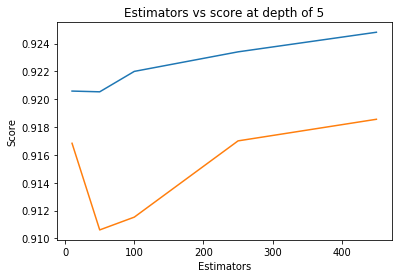

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8878415400925819 test Score 0.8670100880017172
depth =  9 Train Score 0.9588481568467273 test Score 0.9231683252349934
depth =  11 Train Score 0.9619036002520787 test Score 0.9245973800605252
depth =  15 Train Score 0.964369289624158 test Score 0.9245595414986202
depth =  20 Train Score 0.9653687567282108 test Score 0.9260263525822988
depth =  35 Train Score 0.965582358674464 test Score 0.9262239539217346
depth =  50 Train Score 0.965582358674464 test Score 0.9262239539217346
depth =  70 Train Score 0.965582358674464 test Score 0.9262239539217346
depth =  130 Train Score 0.965582358674464 test Score 0.9262239539217346


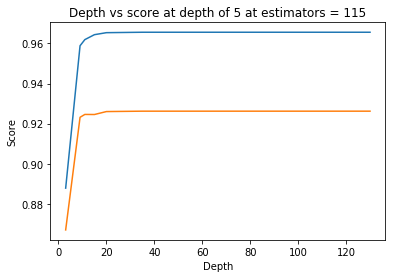

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96381839 0.96299091 0.96097317 0.96315163 0.96475542]
mean train scores [0.96455066 0.96411369 0.96161213 0.96431794 0.9658158 ]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9666308076400024
Test f1 score 0.9262765529364424


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


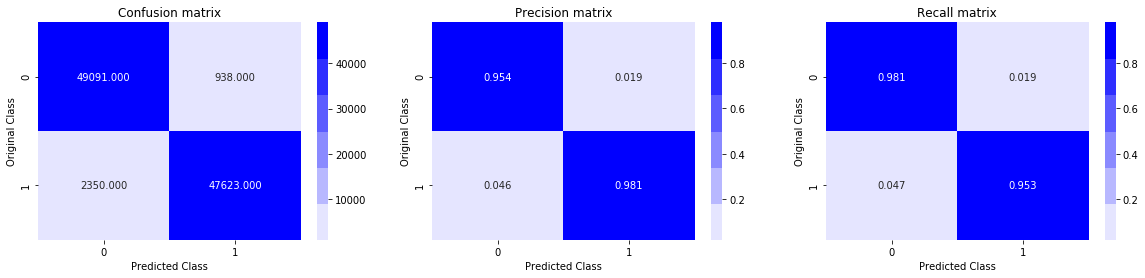

Test confusion_matrix


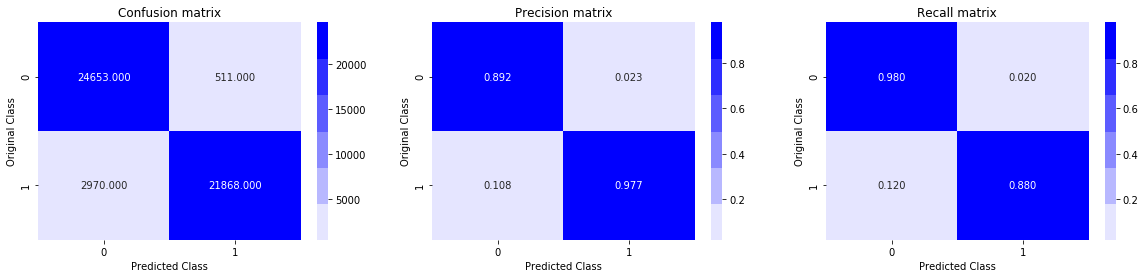

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

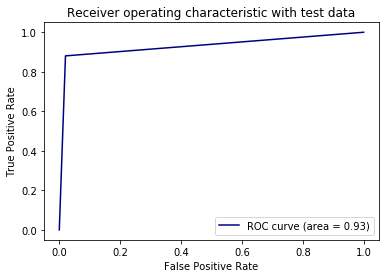

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

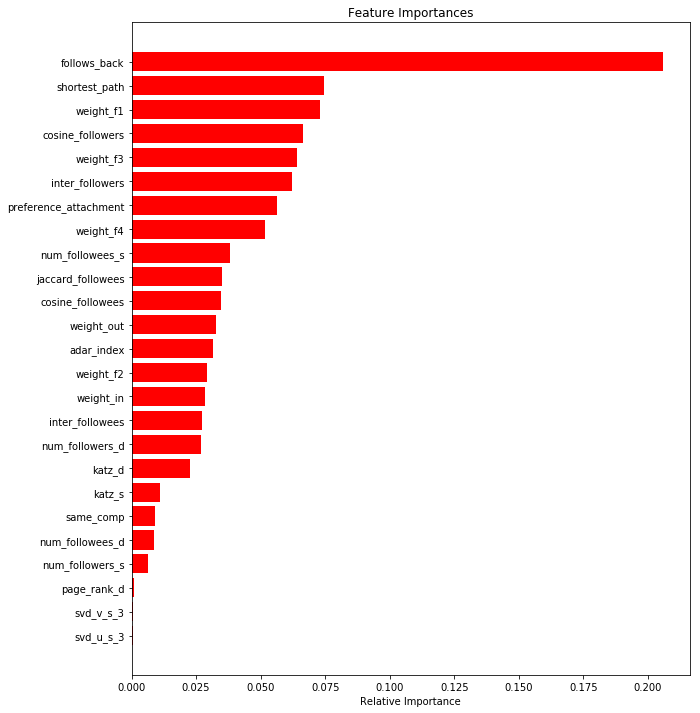

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Assignments:

1. Add another feature called  Preferential Attachment  with followers and followees data of vertex. you can check about Preferential Attachment in below link
http://be.amazd.com/link-prediction/ <br>
2. Add  feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features.  you can read about this in below pdf 
https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf<br>
3. Tune hyperparameters for XG boost with all these features and check the error metric.

### XGBoost Implementation

In [20]:
from xgboost import XGBClassifier

In [21]:
dtdepth = [1, 5, 10, 50, 100, 500]
split = [5, 10, 100, 500]

In [24]:
hp2 = []
cv_f1 = []
tr_f1 = []
hp = []

for i in tqdm(dtdepth): 
    for j in split:
        clf = XGBClassifier(max_depth=i, n_estimators=j)
        clf.fit(df_final_train,y_train)
        y_train_pred =  clf.predict(df_final_train)
        y_cv_pred =  clf.predict(df_final_test)
        tr_f1.append(f1_score(y_train, y_train_pred))
        cv_f1.append(f1_score(y_test, y_cv_pred))
    hp2.append(cv_f1)
    hp.append(tr_f1)
    cv_f1 = []
    tr_f1 = []

100%|██████████| 6/6 [42:33<00:00, 477.47s/it]


In [25]:
train_range = pd.DataFrame(hp, index = dtdepth, columns = split)
test_range = pd.DataFrame(hp2, index = dtdepth, columns = split)

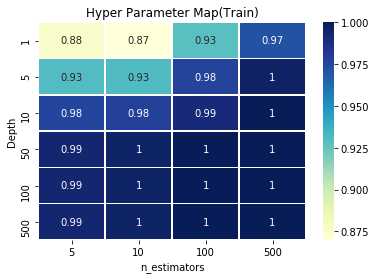

In [27]:
sns.heatmap(train_range, annot = True, cmap="YlGnBu" , linewidths=.5) 
plt.title("Hyper Parameter Map(Train)")
plt.xlabel("n_estimators")
plt.ylabel("Depth")
plt.show()

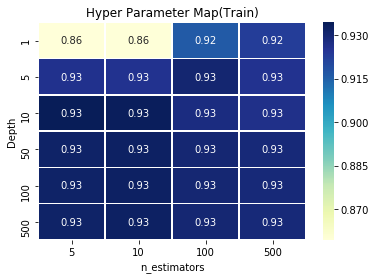

In [28]:
sns.heatmap(test_range, annot = True, cmap="YlGnBu" , linewidths=.5) 
plt.title("Hyper Parameter Map(Train)")
plt.xlabel("n_estimators")
plt.ylabel("Depth")
plt.show()

In [29]:
max(test_range.max())

0.934395242646278

In [30]:
test_range.max()

5      0.934395
10     0.933769
100    0.930329
500    0.929243
dtype: float64

In [31]:
test_range.max(axis = 1)

1      0.922731
5      0.930329
10     0.934395
50     0.932501
100    0.932501
500    0.932501
dtype: float64

In [32]:
clf = XGBClassifier(max_depth=10, n_estimators=5)
clf.fit(df_final_train,y_train)
y_train_pred =  clf.predict(df_final_train)
y_cv_pred =  clf.predict(df_final_test)

In [35]:
print("F1 score for train data is ",f1_score(y_train, y_train_pred))
print("F1 score for test data is ",f1_score(y_test, y_cv_pred))


F1 score for train data is  0.9770787884937345
F1 score for test data is  0.934395242646278


Train confusion_matrix


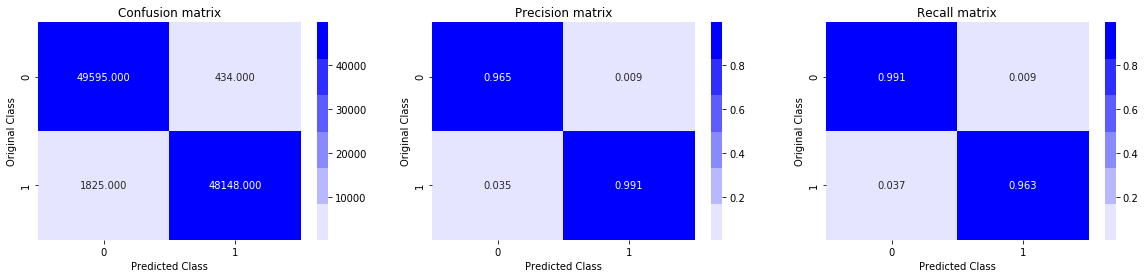

Test confusion_matrix


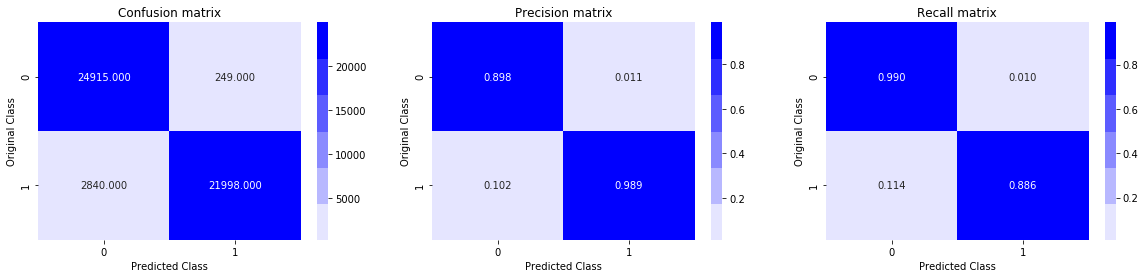

In [36]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_cv_pred)

In [37]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["Vectorizer","Model","Hyper Parameter (depth)","Hyper Parameter(n_esti)","Train F1","Test F1"]
x.add_row(["CustomFeatures", "XGBoost", 10, 5, 0.977, 0.93 ])
print(x)

+----------------+---------+-------------------------+-------------------------+----------+---------+
|   Vectorizer   |  Model  | Hyper Parameter (depth) | Hyper Parameter(n_esti) | Train F1 | Test F1 |
+----------------+---------+-------------------------+-------------------------+----------+---------+
| CustomFeatures | XGBoost |            10           |            5            |  0.977   |   0.93  |
+----------------+---------+-------------------------+-------------------------+----------+---------+


#### Step followed in case study :

 - ____Step 1____ : Analyze data and determine features that can be built using the dataset.
 - ____Step 2____ : Features for graph based problems include indicator_link, preference_attachment, jaccard, cosine, num_followers, inter_followers, adar_index, follows_back, same_comp, shortest_path, weight_in, weight_out, page_rank, katz, svd, dot_svd.
 - ____Step 3____ : Split data into Test and Train data. 
 - ____Step 4____ : Fit train data on each feature and extract corresponding values on test data.
 - ____Step 5____ : Apply Random Forest Classifier and XGBoost.
 - ____Step 6____ : Find the corresponding F1 in each case.
 - ____Step 7____ : The best model is determined with one having the most F1 score.
 
 - ____Observations____ : In the following case study, XGBoost with hyper parameter tuning yields a f1 score train as 0.977 and test 0.93.